# Data Loading

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import tarfile
import bz2
import pandas as pd

In [ ]:
# Paths
tar_bz2_file_path = '/content/drive/My Drive/Colab Notebooks/קורס עיבוד שפה טבעית/cmv.tar.bz2'
output_dir = '/content/cmv'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Extract the tar.bz2 file
with tarfile.open(tar_bz2_file_path, 'r:bz2') as tar:
    tar.extractall(path=output_dir)

print(f"Content extracted to: {output_dir}")

# Paths
op_data_train_bz2_file_path = os.path.join(output_dir, 'op_task/train_op_data.jsonlist.bz2')
op_data_train_file_path = op_data_train_bz2_file_path[:-4]
op_data_heldout_bz2_file_path = os.path.join(output_dir, 'op_task/heldout_op_data.jsonlist.bz2')
op_data_heldout_file_path = op_data_heldout_bz2_file_path[:-4]

# Extract and save the decompressed content
with bz2.open(op_data_train_bz2_file_path, 'rt') as compressed_file:
    with open(op_data_train_file_path, 'w') as decompressed_file:
        decompressed_file.write(compressed_file.read())

print(f"Content extracted and saved to: {op_data_train_file_path}")

with bz2.open(op_data_heldout_bz2_file_path, 'rt') as compressed_file:
    with open(op_data_heldout_file_path, 'w') as decompressed_file:
        decompressed_file.write(compressed_file.read())

print(f"Content extracted and saved to: {op_data_heldout_file_path}")

Content extracted to: /content/cmv
Content extracted and saved to: /content/cmv/op_task/train_op_data.jsonlist
Content extracted and saved to: /content/cmv/op_task/heldout_op_data.jsonlist


In [30]:
# Paths to directories (update these paths as necessary)
root_dir = '/home/rize/deep_assignments/NLP'

In [5]:
with bz2.open(root_dir+'/CMv data/op_task/heldout_op_data.jsonlist.bz2', 'rt') as compressed_file:
    with open(root_dir+'/CMv data/op_task/heldout_op_data.jsonlist', 'w') as decompressed_file:
        decompressed_file.write(compressed_file.read())

with bz2.open(root_dir+'/CMv data/op_task/train_op_data.jsonlist.bz2', 'rt') as compressed_file:
    with open(root_dir+'/CMv data/op_task/train_op_data.jsonlist', 'w') as decompressed_file:
        decompressed_file.write(compressed_file.read())

In [5]:
test_df = pd.read_json(root_dir+'/CMv data/op_task/heldout_op_data.jsonlist', lines=True)
train_df = pd.read_json(root_dir+'/CMv data/op_task/train_op_data.jsonlist', lines=True)

In [6]:
train_df

,title,delta_label,name,selftext
0,CMV: I shouldn't get a job in this economic cl...,False,t3_2rpsl8,I think the world is automating fast enough th...
1,CMV: Iran has the right to develop nuclear wea...,False,t3_2rpfn7,"First off, I do not believe that Iran *should*..."
2,CMV: The events in Paris suck...but the comic ...,False,t3_2rpevf,Please leave the footnote below the following ...
3,CMV: It is ok to hate a religion so long as yo...,False,t3_2rpcgr,It seems to me that it is entirely justified t...
4,"CMV: There is no productive reason to have, ""U...",False,t3_2romiq,"The, ""Under God"" line is actually a relatively..."
...,...,...,...,...
10738,CMV: A normal drawing of Muhammad should not b...,False,t3_2rqy8s,Muhammad did not prohibit paintings of him bec...
10739,CMV: School hours should be 9am to 5pm to matc...,True,t3_2rqvf8,It seems logical to me that school hours shoul...
10740,CMV: Dynastic Wealth Should Not Be Allowed,False,t3_2rqija,I think that dynastic wealth i.e. passing down...
10741,"CMV: Cars are a bad idea. like oil, we should ...",False,t3_2rqbt8,cars are a bad idea. just like oil is a bad id...


In [9]:
test_df

,title,delta_label,name,selftext
0,CMV: The contribution of vegans/vegetarians an...,True,t3_3j8yfq,I'll start off by saying I'm a vegetarian and ...
1,CMV: Anti-discrimination law is discriminatory.,False,t3_3j8n34,Al Franken went on Jon Stewart [a few weeks ag...
2,"CMV: Nicki Minaj is in the wrong, not Miley.",False,t3_3j8bhs,"I'll be honest with you, I didn't even know ab..."
3,CMV: The TSA was never meant to keep us safe,False,t3_3j7iry,"After September 11th, the TSA was created beca..."
4,CMV:I want to live in Scandinavia,True,t3_3j7dlx,"Hello, I'm Luke and for the longest time a sma..."
...,...,...,...,...
1524,"CMV: Telling children they are ""special"" is un...",False,t3_35eca7,"Kids already naturally feel ""special"" and esse..."
1525,"CMV: In its current form, Snoo is not a very g...",True,t3_35cytn,"For a social media site such as Reddit, a well..."
1526,CMV: It makes more sense to prioritize sufferi...,False,t3_35bm28,You can't experience nonexistence. You can ex...
1527,CMV: People shouldn't make fun of Madonna for ...,False,t3_35blwd,She can't control the fact that she gets older...


# Data Preprocessing

In [7]:
def preprocess_title(title):
    title = title.replace('CMV', '').replace('Cmv', '').replace('cmv', '')
    title = title.strip('[]:;-., \n')
    while ' \n' in title:
        title = title.replace(' \n', '\n')
    title = title + ': '

    return title


def preprocess_body(body):
    body = body.replace('Please leave the footnote below the following line, but remember to delete this sentence by replacing it with the body of your post. Thank you!', '')
    suffix_index = body.find('\n\n&gt; *Hello')
    if suffix_index != -1:
        body = body[:suffix_index]
    body = body.strip(' \n_')
    while ' \n' in body:
        body = body.replace(' \n', '\n')

    return body

def preprocess_df(df):
    df['text'] = df['title'].apply(preprocess_title) + df['selftext'].apply(preprocess_body)
    df['label'] = df['delta_label'].apply(lambda x: 1 if x else 0)
    df = df.drop(columns=['title', 'delta_label', 'name', 'selftext'])

    return df

In [8]:
train_df = preprocess_df(train_df)
test_df = preprocess_df(test_df)

In [12]:
train_df

,text,label
0,I shouldn't get a job in this economic climate...,0
1,Iran has the right to develop nuclear weapons:...,0
2,The events in Paris suck...but the comic creat...,0
3,It is ok to hate a religion so long as you do ...,0
4,"There is no productive reason to have, ""Under ...",0
...,...,...
10738,A normal drawing of Muhammad should not be off...,0
10739,School hours should be 9am to 5pm to match off...,1
10740,Dynastic Wealth Should Not Be Allowed: I think...,0
10741,"Cars are a bad idea. like oil, we should move ...",0


In [13]:
test_df

,text,label
0,The contribution of vegans/vegetarians and oth...,1
1,Anti-discrimination law is discriminatory: Al ...,0
2,"Nicki Minaj is in the wrong, not Miley: I'll b...",0
3,The TSA was never meant to keep us safe: After...,0
4,"I want to live in Scandinavia: Hello, I'm Luke...",1
...,...,...
1524,"Telling children they are ""special"" is unneces...",0
1525,"In its current form, Snoo is not a very good l...",1
1526,It makes more sense to prioritize suffering ov...,0
1527,People shouldn't make fun of Madonna for being...,0


In [14]:
train_df['label'].value_counts()

label
0    7552
1    3191
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_df, validation_df = train_test_split(train_df, test_size=0.14, stratify=train_df['label'], random_state=42)

In [17]:
train_df

,text,label
1381,Fearing death doesn't make any sense: First of...,1
2093,"In a normal American's life, it is morally wro...",0
4173,I believe that anyone who is against the MRA h...,0
436,Those who complain about the USA calling itsel...,0
4948,parents who deliberately create a disabled chi...,1
...,...,...
7893,I believe toll roads are bad and just another ...,0
142,OKCupid's way of displaying others to you base...,0
3267,I think the mainstream American Christian cult...,1
5086,I believe infantile circumcision is wrong in a...,0


In [18]:
validation_df

,text,label
8915,I've never seen Communism as a bad thing: Sure...,1
6463,I believe that most people should not be blind...,0
4072,I think earth hour is dumb and useless: I woul...,0
7570,"I believe that it is wrong, if not disgusting,...",0
1268,US copyright terms should be significantly sho...,0
...,...,...
2978,Marilyn Monroe does not deserve the reputation...,0
10190,"Unions have outlasted their usefulness. ""Right...",0
9860,Morality is both futile in purpose (due to ast...,0
9773,"Ultimately, no problems will arise from the In...",1


# Fine-Tuning

In [19]:
!pip install transformers==4.45.2 sentence-transformers==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 479.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 24.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 3.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.9 MB/s eta 0:00:0000:010:010m
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  You can safely remove it manually.
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.3
    Uninstalling transformers-4.42.3:
      Successfully uninstalled transformers-4.42.3


In [11]:
import torch

In [12]:
if torch.cuda.is_available():
    print('Using CUDA')
    device = torch.device('cuda')
else:
    print('Using CPU')
    device = torch.device('cpu')

Using CUDA


In [22]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 17.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.9 MB/s eta 0:00:00ta 0:00:01


In [13]:
from datasets import Dataset

/home/rize/.conda/envs/deep/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
train_dataset = Dataset.from_pandas(train_df)
validation_dataset = Dataset.from_pandas(validation_df)
test_dataset = Dataset.from_pandas(test_df)

In [15]:
from transformers import BertTokenizer

In [16]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=512)

In [17]:
train_tokenized_dataset = train_dataset.map(tokenize_function, batched=True)
validation_tokenized_dataset = validation_dataset.map(tokenize_function, batched=True)
test_tokenized_dataset = test_dataset.map(tokenize_function, batched=True).remove_columns(['text'])

Map: 100%|██████████| 1529/1529 [00:08<00:00, 187.62 examples/s]


In [28]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 508.3 kB/s eta 0:00:0000:0100:01


In [18]:
import evaluate
import numpy as np

In [19]:
accuracy_metric = evaluate.load('accuracy')

def compute_metrics(evaluation_prediction):
    logits, labels = evaluation_prediction
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

In [20]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [21]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=train_df['label'])
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print(f'Class Weights: {class_weights}')

Class Weights: tensor([0.7113, 1.6833], device='cuda:0')


In [22]:
from transformers import Trainer
from torch.nn import CrossEntropyLoss

In [34]:
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        # Custom loss computation logic
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # Compute your custom loss (e.g., CrossEntropyLoss)
        loss = self.label_smoother(outputs, labels) if self.label_smoother else outputs.loss
        
        # If required, handle `return_outputs`
        return (loss, outputs) if return_outputs else loss

## First Version (lr=2e-5, batch_size=32)

In [24]:
from transformers import AutoModelForSequenceClassification

In [25]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, torch_dtype='auto')
model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
from transformers import TrainingArguments

In [35]:
training_arguments = TrainingArguments(
    output_dir=root_dir+'/results/op_embedding/test_trainer1',
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs',
    logging_steps=50,
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

In [28]:
from transformers import EarlyStoppingCallback

In [36]:
trainer = CustomTrainer(
    model=model,
    args=training_arguments,
    train_dataset=train_tokenized_dataset,
    eval_dataset=validation_tokenized_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [40]:
torch.cuda.empty_cache()

In [41]:
trainer.train()

OutOfMemoryError: CUDA out of memory. Tried to allocate 48.00 MiB. GPU 

In [ ]:
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

In [ ]:
# Initialize a data collator with your tokenizer
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Prepare test dataloader
test_dataloader = DataLoader(test_tokenized_dataset, batch_size=64, collate_fn=data_collator)

In [ ]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
def evaluate_model(trainer_number = None, checkpoint_number = None):
    if trainer_number is None and checkpoint_number is None:
        # Use the pretrained model as baseline
        model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, torch_dtype='auto')
    else:
        # Load the checkpointed model
        model = AutoModelForSequenceClassification.from_pretrained(f'/content/test_trainer{trainer_number}/checkpoint-{checkpoint_number}')
    model = model.to(device)

    all_predictions = []
    all_probabilities = []
    all_labels = []

    model.eval()  # Ensure the model is in evaluation mode
    with torch.no_grad():
        for batch in test_dataloader:
            inputs = {key: val.to(device) for key, val in batch.items() if key != "labels"}
            labels = batch["labels"].to(device)

            # Forward pass
            outputs = model(**inputs)
            logits = outputs.logits

            # Get predicted probabilities and predictions
            probabilities = torch.softmax(logits, dim=-1)  # Convert logits to probabilities
            predictions = torch.argmax(probabilities, dim=-1)

            # Store results
            all_predictions.extend(predictions.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy()[:, 1])  # Probabilities for class 1
            all_labels.extend(labels.cpu().numpy())

    # Generate classification report
    report = classification_report(all_labels, all_predictions, target_names=["Class 0", "Class 1"])
    print(report)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_probabilities)
    auroc = roc_auc_score(all_labels, all_probabilities)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUROC = {auroc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


              precision    recall  f1-score   support

     Class 0       0.56      0.97      0.71       857
     Class 1       0.51      0.04      0.08       672

    accuracy                           0.56      1529
   macro avg       0.54      0.51      0.40      1529
weighted avg       0.54      0.56      0.43      1529



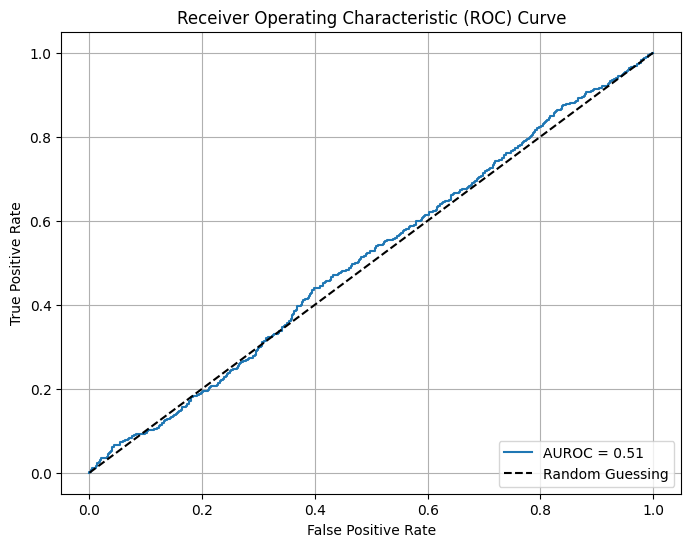

In [ ]:
evaluate_model()  # Baseline

              precision    recall  f1-score   support

     Class 0       0.59      0.71      0.65       857
     Class 1       0.51      0.38      0.44       672

    accuracy                           0.57      1529
   macro avg       0.55      0.55      0.54      1529
weighted avg       0.56      0.57      0.56      1529



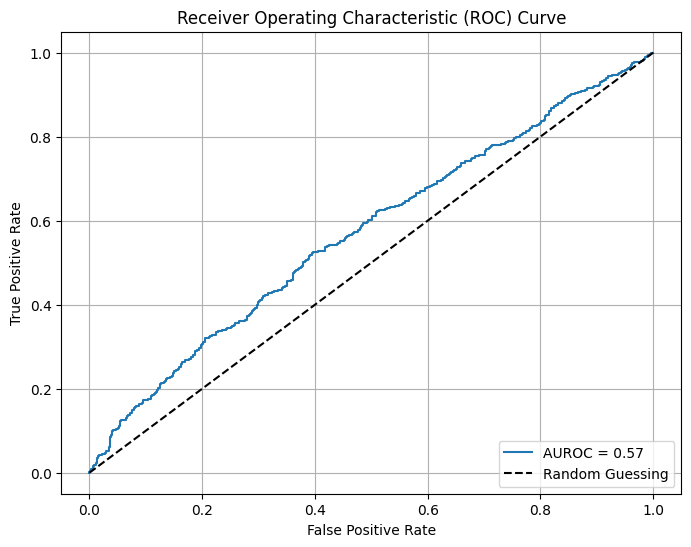

In [ ]:
evaluate_model(1, 289)  # Epoch 1

              precision    recall  f1-score   support

     Class 0       0.63      0.23      0.34       857
     Class 1       0.46      0.83      0.59       672

    accuracy                           0.49      1529
   macro avg       0.55      0.53      0.46      1529
weighted avg       0.56      0.49      0.45      1529



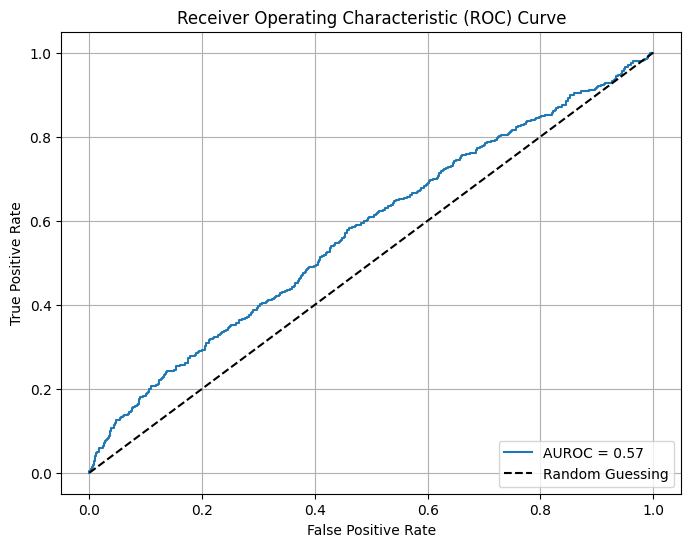

In [ ]:
evaluate_model(1, 578)  # Epoch 2

              precision    recall  f1-score   support

     Class 0       0.58      0.74      0.65       857
     Class 1       0.49      0.32      0.39       672

    accuracy                           0.56      1529
   macro avg       0.54      0.53      0.52      1529
weighted avg       0.54      0.56      0.54      1529



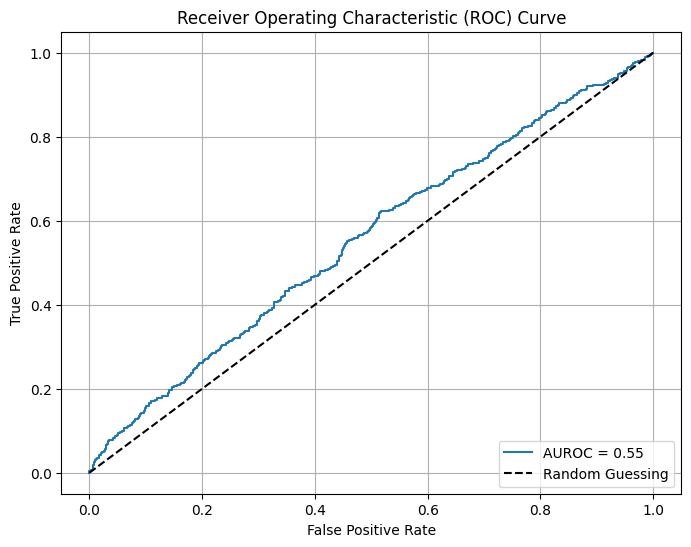

In [ ]:
evaluate_model(1, 867)  # Epoch 3

## Second Version (lr=1e-5, batch_size=32)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, torch_dtype='auto')
model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_arguments = TrainingArguments(
    output_dir='/content/test_trainer2',
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs',
    logging_steps=50,
    learning_rate=1e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

In [ ]:
trainer = CustomTrainer(
    model=model,
    args=training_arguments,
    train_dataset=train_tokenized_dataset,
    eval_dataset=validation_tokenized_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.691800,0.686171,0.562126
2,0.671700,0.697031,0.421927
3,0.646300,0.712795,0.527575
4,0.570000,0.751468,0.539535


TrainOutput(global_step=1156, training_loss=0.6438725681453428, metrics={'train_runtime': 759.3772, 'train_samples_per_second': 121.652, 'train_steps_per_second': 3.806, 'total_flos': 9722479717662720.0, 'train_loss': 0.6438725681453428, 'epoch': 4.0})

              precision    recall  f1-score   support

     Class 0       0.62      0.61      0.62       857
     Class 1       0.51      0.52      0.51       672

    accuracy                           0.57      1529
   macro avg       0.56      0.57      0.56      1529
weighted avg       0.57      0.57      0.57      1529



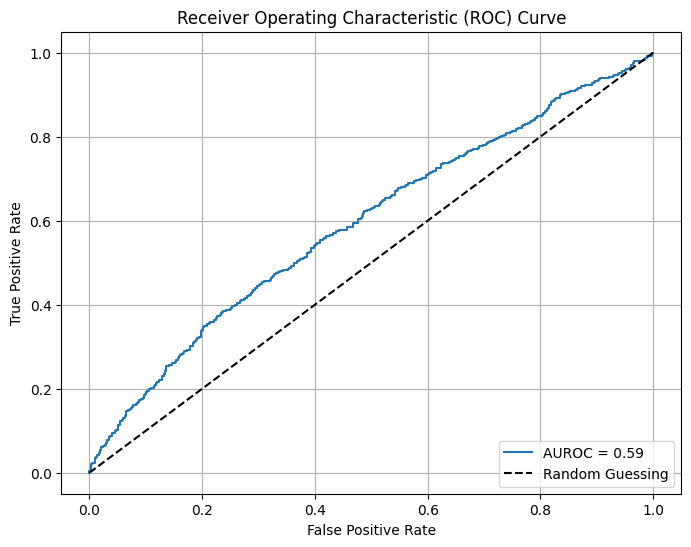

In [ ]:
evaluate_model(2, 289)  # Epoch 1

In [ ]:
import shutil
from google.colab import files

In [ ]:
def download_checkpoint(trainer_number, checkpoint_number):
    trainer_directory_path = f'/content/test_trainer{trainer_number}'
    shutil.make_archive(f'{trainer_directory_path}/trainer{trainer_number}_checkpoint{checkpoint_number}', 'zip', f'{trainer_directory_path}/checkpoint-{checkpoint_number}')
    files.download(f'{trainer_directory_path}/trainer{trainer_number}_checkpoint{checkpoint_number}.zip')

In [ ]:
download_checkpoint(2, 289)

              precision    recall  f1-score   support

     Class 0       0.60      0.25      0.35       857
     Class 1       0.45      0.79      0.58       672

    accuracy                           0.49      1529
   macro avg       0.53      0.52      0.46      1529
weighted avg       0.54      0.49      0.45      1529



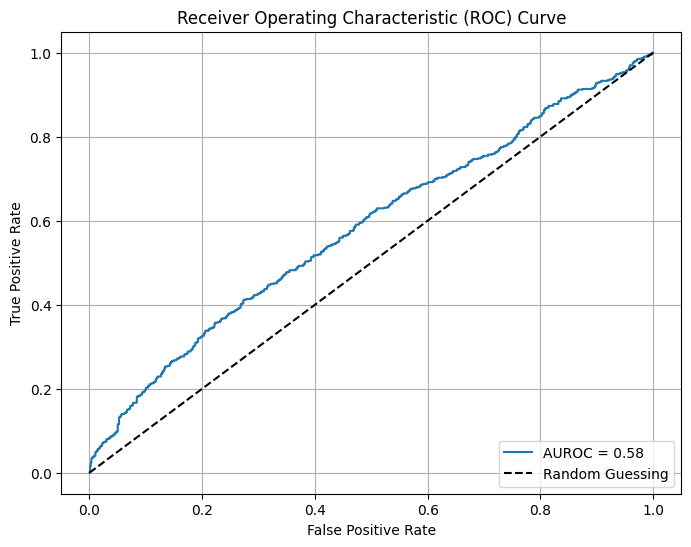

In [ ]:
evaluate_model(2, 578)  # Epoch 2

              precision    recall  f1-score   support

     Class 0       0.62      0.45      0.52       857
     Class 1       0.48      0.65      0.55       672

    accuracy                           0.54      1529
   macro avg       0.55      0.55      0.54      1529
weighted avg       0.56      0.54      0.54      1529



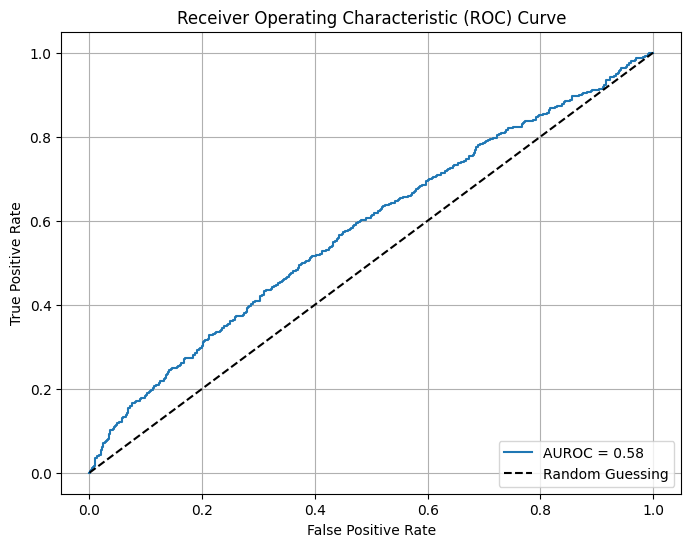

In [ ]:
evaluate_model(2, 867)  # Epoch 3

## Third Version (lr=2e-5, batch_size=64)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, torch_dtype='auto')
model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_arguments = TrainingArguments(
    output_dir='/content/test_trainer3',
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs',
    logging_steps=50,
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=10,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

In [ ]:
trainer = CustomTrainer(
    model=model,
    args=training_arguments,
    train_dataset=train_tokenized_dataset,
    eval_dataset=validation_tokenized_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=4)]
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.694400,0.687076,0.558804
2,0.674800,0.698780,0.399336
3,0.630600,0.697052,0.580731
4,0.524000,0.786177,0.570100
5,0.381100,0.950262,0.568106
6,0.272100,1.165025,0.591362
7,0.183300,1.466542,0.643189
8,0.138800,1.596051,0.621927
9,0.089100,1.725420,0.617940
10,0.071500,1.762287,0.610631


TrainOutput(global_step=1450, training_loss=0.36825045602074985, metrics={'train_runtime': 1848.0716, 'train_samples_per_second': 49.987, 'train_steps_per_second': 0.785, 'total_flos': 2.43061992941568e+16, 'train_loss': 0.36825045602074985, 'epoch': 10.0})

              precision    recall  f1-score   support

     Class 0       0.62      0.61      0.61       857
     Class 1       0.51      0.53      0.52       672

    accuracy                           0.57      1529
   macro avg       0.57      0.57      0.57      1529
weighted avg       0.57      0.57      0.57      1529



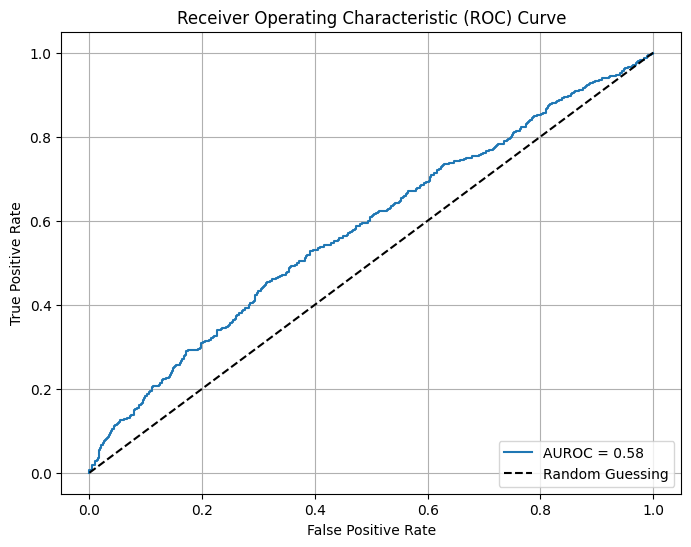

In [ ]:
evaluate_model(3, 145)  # Epoch 1

              precision    recall  f1-score   support

     Class 0       0.63      0.22      0.33       857
     Class 1       0.46      0.83      0.59       672

    accuracy                           0.49      1529
   macro avg       0.54      0.53      0.46      1529
weighted avg       0.55      0.49      0.44      1529



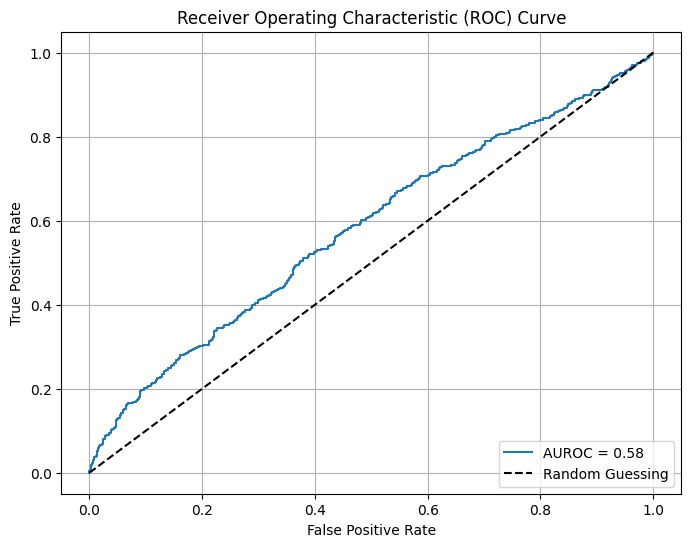

In [ ]:
evaluate_model(3, 290)  # Epoch 2

              precision    recall  f1-score   support

     Class 0       0.60      0.62      0.61       857
     Class 1       0.49      0.47      0.48       672

    accuracy                           0.55      1529
   macro avg       0.55      0.55      0.55      1529
weighted avg       0.55      0.55      0.55      1529



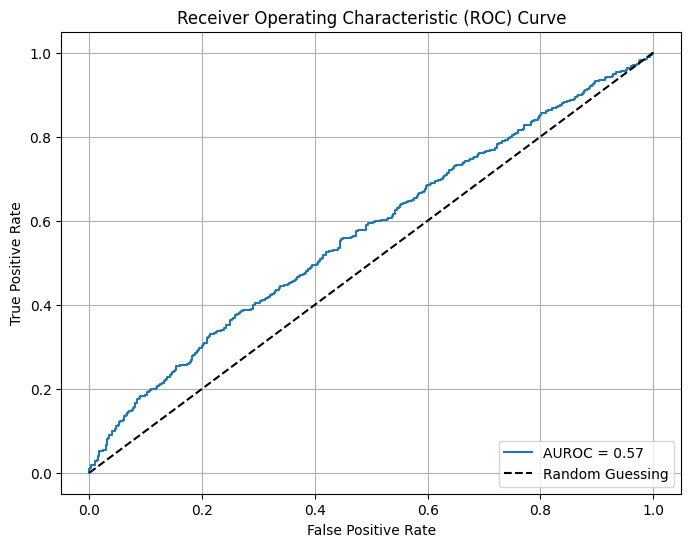

In [ ]:
evaluate_model(3, 435)  # Epoch 3

## Fourth Version (lr=1e-5, batch_size=64)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, torch_dtype='auto')
model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_arguments = TrainingArguments(
    output_dir='/content/test_trainer4',
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs',
    logging_steps=50,
    learning_rate=1e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=10,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

In [ ]:
trainer = CustomTrainer(
    model=model,
    args=training_arguments,
    train_dataset=train_tokenized_dataset,
    eval_dataset=validation_tokenized_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy
1,0.690100,0.686248,0.536213
2,0.668300,0.688643,0.502326
3,0.647500,0.694791,0.592691
4,0.614700,0.721771,0.615282
5,0.561700,0.785287,0.614618
6,0.508200,0.808703,0.578738
7,0.454700,0.865932,0.608638


TrainOutput(global_step=1015, training_loss=0.5948965669265521, metrics={'train_runtime': 1320.5071, 'train_samples_per_second': 69.958, 'train_steps_per_second': 1.098, 'total_flos': 1.701433950590976e+16, 'train_loss': 0.5948965669265521, 'epoch': 7.0})

              precision    recall  f1-score   support

     Class 0       0.63      0.52      0.57       857
     Class 1       0.50      0.61      0.55       672

    accuracy                           0.56      1529
   macro avg       0.57      0.57      0.56      1529
weighted avg       0.57      0.56      0.56      1529



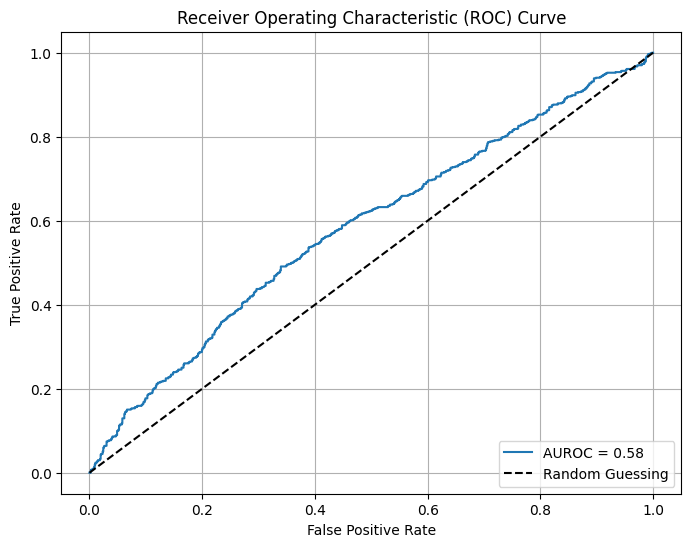

In [ ]:
evaluate_model(4, 145)  # Epoch 1

              precision    recall  f1-score   support

     Class 0       0.61      0.44      0.51       857
     Class 1       0.47      0.65      0.55       672

    accuracy                           0.53      1529
   macro avg       0.54      0.54      0.53      1529
weighted avg       0.55      0.53      0.53      1529



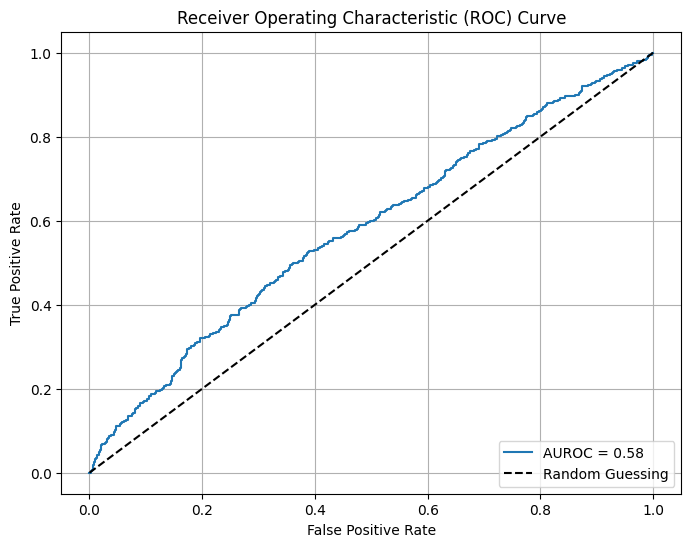

In [ ]:
evaluate_model(4, 290)  # Epoch 2

              precision    recall  f1-score   support

     Class 0       0.61      0.61      0.61       857
     Class 1       0.50      0.50      0.50       672

    accuracy                           0.56      1529
   macro avg       0.55      0.55      0.55      1529
weighted avg       0.56      0.56      0.56      1529



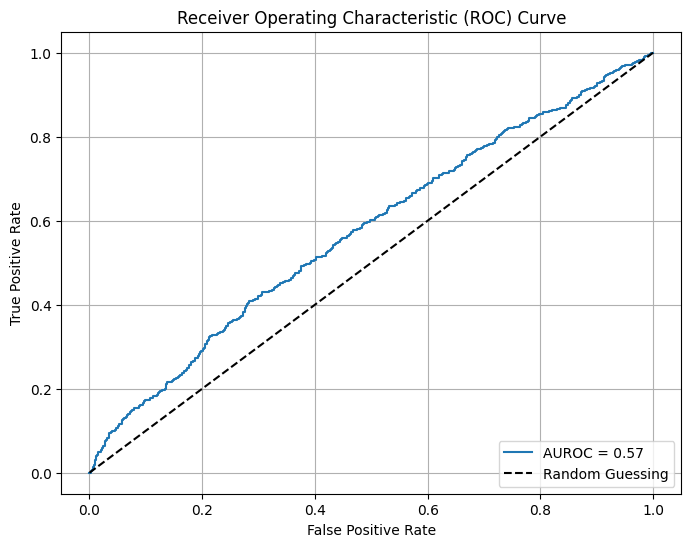

In [ ]:
evaluate_model(4, 435)  # Epoch 3

              precision    recall  f1-score   support

     Class 0       0.59      0.68      0.63       857
     Class 1       0.50      0.40      0.44       672

    accuracy                           0.56      1529
   macro avg       0.55      0.54      0.54      1529
weighted avg       0.55      0.56      0.55      1529



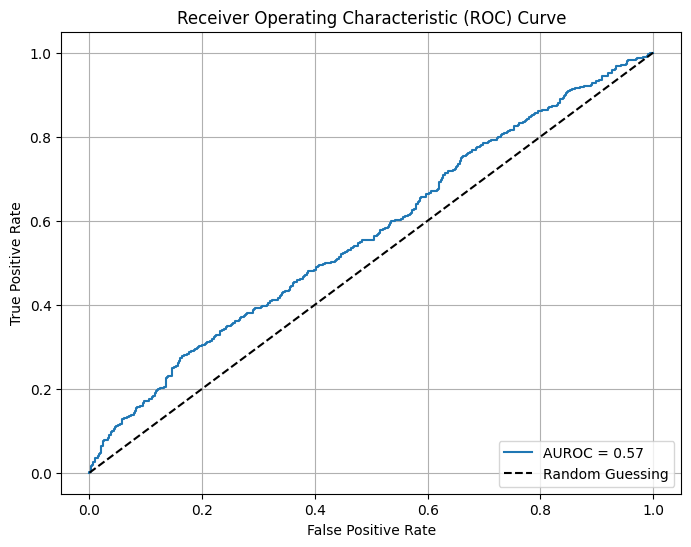

In [ ]:
evaluate_model(4, 580)  # Epoch 4

## Trying the Best Version Without Custom Loss Function for Class Weights (lr=1e-5, batch_size=32)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2, torch_dtype='auto')
model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_arguments = TrainingArguments(
    output_dir='/content/test_trainer5',
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs',
    logging_steps=50,
    learning_rate=1e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=4,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model='accuracy'
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_arguments,
    train_dataset=train_tokenized_dataset,
    eval_dataset=validation_tokenized_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.598300,0.603376,0.702326
2,0.577100,0.607169,0.697010
3,0.581200,0.615617,0.689037
4,0.519200,0.627299,0.668439


TrainOutput(global_step=1156, training_loss=0.5752319969932925, metrics={'train_runtime': 760.502, 'train_samples_per_second': 48.589, 'train_steps_per_second': 1.52, 'total_flos': 9722479717662720.0, 'train_loss': 0.5752319969932925, 'epoch': 4.0})

              precision    recall  f1-score   support

     Class 0       0.56      1.00      0.72       857
     Class 1       0.67      0.00      0.01       672

    accuracy                           0.56      1529
   macro avg       0.61      0.50      0.36      1529
weighted avg       0.61      0.56      0.41      1529



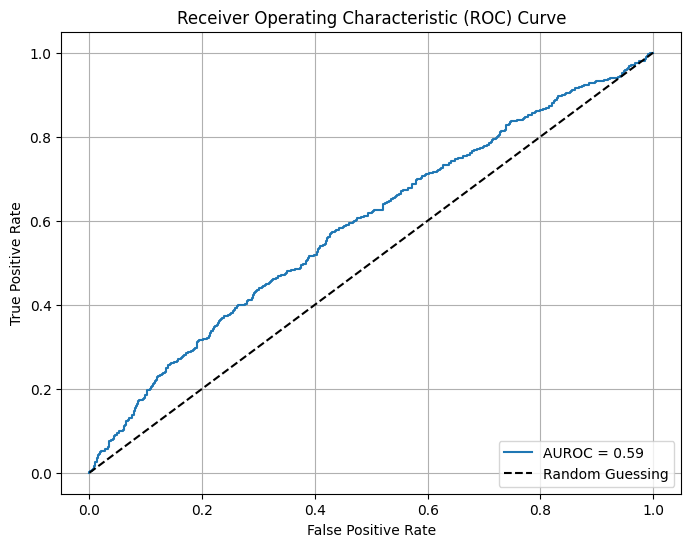

In [ ]:
evaluate_model(5, 289)  # Epoch 1

              precision    recall  f1-score   support

     Class 0       0.57      0.98      0.72       857
     Class 1       0.64      0.05      0.09       672

    accuracy                           0.57      1529
   macro avg       0.60      0.51      0.41      1529
weighted avg       0.60      0.57      0.44      1529



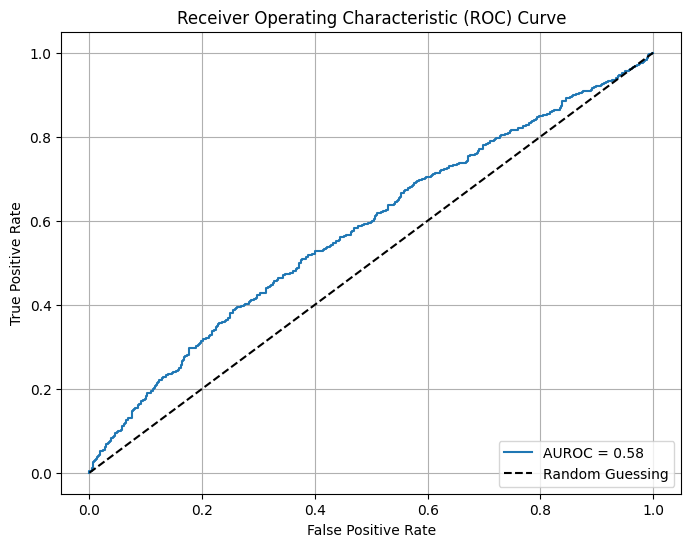

In [ ]:
evaluate_model(5, 578)  # Epoch 2

              precision    recall  f1-score   support

     Class 0       0.57      0.95      0.72       857
     Class 1       0.61      0.09      0.16       672

    accuracy                           0.58      1529
   macro avg       0.59      0.52      0.44      1529
weighted avg       0.59      0.58      0.47      1529



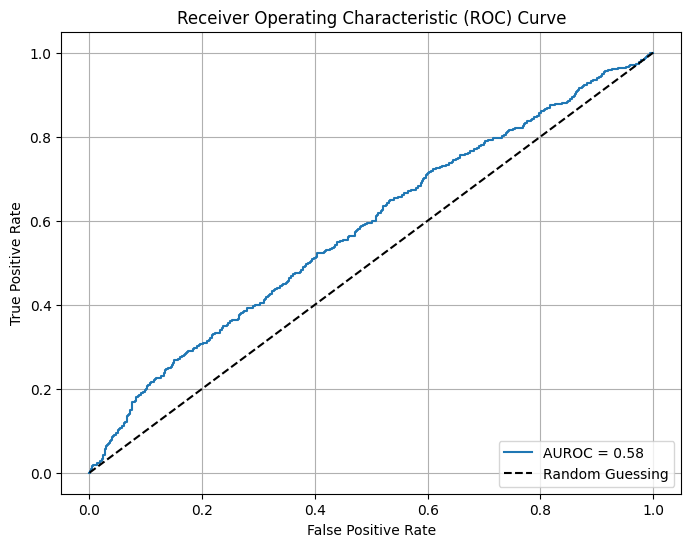

In [ ]:
evaluate_model(5, 867)  # Epoch 3